In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("tile_placements.csv")


In [5]:
df["ts"] = pd.to_datetime(df["ts"], unit="ms")
df.sort_values("ts", inplace=True)
df = df.reset_index(drop=True)
df.head()

,ts,user,x_coordinate,y_coordinate,color
0,2017-03-31 00:04:48,2puPLvQ6X2zTSpfBkHXhxlIVo40=,505,510,1
1,2017-03-31 00:05:28,2puPLvQ6X2zTSpfBkHXhxlIVo40=,490,504,1
2,2017-03-31 00:06:21,2puPLvQ6X2zTSpfBkHXhxlIVo40=,518,498,0
3,2017-03-31 00:15:37,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,495,11
4,2017-03-31 00:15:49,GP2B74SRyrZ3HIflSFoAzM+jS3U=,477,495,11


In [9]:
colors = ['#EFEFEF', '#E4E4E4', '#888888', '#222222', '#FFA7D1', '#E50000', '#E59500', '#A06A42', '#E5D900', '#94E044',
          '#02BE01', '#00E5F0', '#0083C7', '#0000EA', '#E04AFF', '#820080']
%matplotlib inline

In [7]:
color_freq = df["color"].value_counts().reset_index().sort_values("index").rename(columns={"index" : "color", "color" : "freq"})

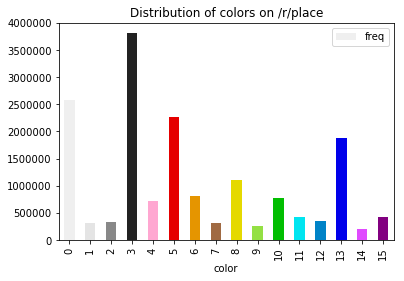

In [10]:
cl_plt = color_freq.plot(kind="bar", x="color", y="freq", color=colors)
cl_plt.set_title("Distribution of colors on /r/place")

In [6]:
btm_right = df[(df["x_coordinate"] > 800) & (df["y_coordinate"] > 800)]
btm_right.size

4053840

In [7]:
btm_right.head()

,ts,user,x_coordinate,y_coordinate,color
188,2017-03-31 03:39:33,PQ87ndys7DDEAIxeAw5sE6R4y08=,999,999,3
708,2017-03-31 16:58:29,trfROXtZJ+d5a5A7VDCTxY9tblA=,999,999,15
820,2017-03-31 16:58:54,L3VUQltMEMlE8XrVnRuaPB0w93s=,999,999,5
1060,2017-03-31 16:59:48,8hi1qMIqWsP2iTnu2rl9jOYmanM=,999,999,13
1626,2017-03-31 17:01:49,BuXxP+iBAu2O97Bim2G2SPy1us4=,998,998,13


In [8]:
btm_right_col_dist = btm_right["color"].value_counts().reset_index().sort_values("index")
btm_right_col_dist.columns = ["color", "freq"]
btm_right_col_dist.head()

,color,freq
2,0,75284
13,1,7284
11,2,8753
1,3,92854
9,4,17619


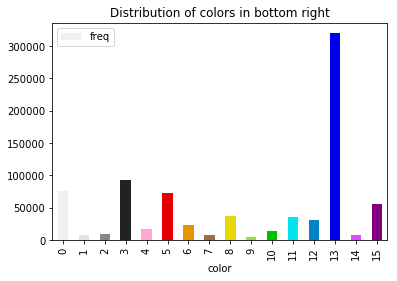

In [9]:
btmr_plot = btm_right_col_dist.plot(kind="bar", x="color", y="freq", color=colors)
btmr_plot.set_title("Distribution of colors in bottom right")

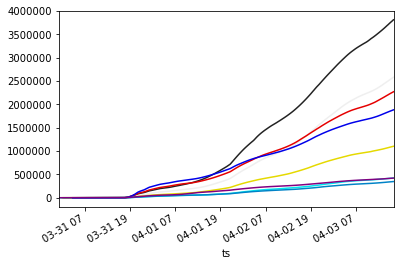

In [10]:
import datetime
pd.options.mode.chained_assignment = None
fig, ax = plt.subplots()

for i in [0,3,5,8,11,12,13,15]:
    reds = df[df["color"] == i]
    reds["cum_sum"] = df.groupby("color").cumcount()
    ax = reds.plot(ax=ax, x="ts", y="cum_sum", color=colors[i], legend=False)
    
plt.show()

In [27]:
import requests


In [6]:
def point_in_poly(pt, vs):
    #NOT MY CODE, FROM https://github.com/substack/point-in-polygon/blob/master/index.js
    x, y = pt    
    inside = False

    rng = list(range(len(vs)))
    for i, j in zip(rng, [rng[-1]] + rng[:-1]):
        xi, yi = vs[i]
        xj, yj = vs[j]

        between = (yi > y) != (yj > y)
        intersect = between and (x < (xj - xi) * (y - yi) / (yj - yi) + xi)

        if intersect:
            inside = not inside

    return inside


In [68]:
places[74]

{'center': [529.5, 214.5],
 'description': 'One of the first additions to the map, this text of a meme from the prequel Star Wars movies started out as an uncoordinated attempt to write something everyone knew, and was refined to the masterpiece you see today.',
 'id': 75,
 'name': 'Darth Plagueis The Wise',
 'path': [[447.5, 279.5],
  [447.5, 163.5],
  [444.5, 163.5],
  [444.5, 144.5],
  [458.5, 144.5],
  [458.5, 149.5],
  [573.5, 149.5],
  [573.5, 151.5],
  [610.5, 151.5],
  [610.5, 199.5],
  [613.5, 199.5],
  [613.5, 210.5],
  [610.5, 213.5],
  [610.5, 217.5],
  [609.5, 220.5],
  [609.5, 222.5],
  [610.5, 223.5],
  [613.5, 227.5],
  [613.5, 238.5],
  [613.5, 274.5],
  [607.5, 279.5]],
 'subreddit': '/r/prequelmemes',
 'website': ''}

In [9]:
def bound_rect_df(s_df, path):
    s_length = len(s_df.index)
    xs, ys = zip(*path)
    
    xMax, xMin = max(xs), min(xs)
    yMax, yMin = max(ys), min(ys)
    
    
    #Really optmized numpy matrix calculations to narrow down the 16.5 million into only reasonable ones
    bounded_df = s_df[(s_df["x_coordinate"] < xMax) & (s_df["x_coordinate"] > xMin) & (s_df["y_coordinate"] > yMin) & (s_df["y_coordinate"] < yMax)]
    
    e_length = len(bounded_df.index)
    print("Bounded dataframe from {} rows to {} rows".format(s_length, e_length))
    return bounded_df


In [113]:
darthSquares.head()

,ts,user,x_coordinate,y_coordinate,color
2335,2017-03-31 17:03:51,+hLAu8XfVuIiIU8U2VgNK1aALug=,517,244,9
3885,2017-03-31 17:07:51,KhdAlZvkoPsYpP7yCwsRAGK1GRE=,581,215,3
3943,2017-03-31 17:07:58,9TxNKzZN/k+B4XVKl//ZT+S1maw=,562,155,5
4394,2017-03-31 17:08:55,hCtWstL3Gfd2mx7upiP3p/W8l18=,484,239,9
6723,2017-03-31 17:13:29,l/1VHI5LC3pdFw0GLjwhNp7FFaU=,543,248,3


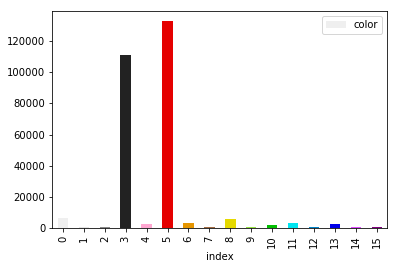

In [118]:
darthSquares["color"].value_counts().reset_index().sort_values("index").plot(kind="bar", x="index", y="color", color=colors)

In [30]:
def get_place_by_id(id):
    for place in places:
        if place["id"] == id:
            return place

In [32]:
desired_place = get_place_by_id(1122)
desired_path = desired_place["path"]
desired_place_title = desired_place["name"]

print(desired_place_title)

USA / Canvas Center


Bounded dataframe from 16559897 rows to 669260 rows


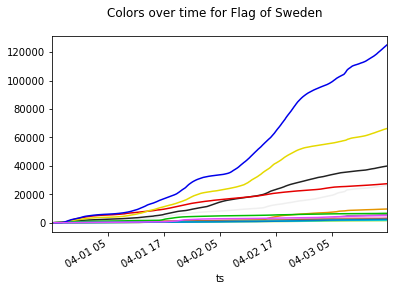

In [43]:
desired_place = get_place_by_id(46)
desired_path = desired_place["path"]
desired_place_title = desired_place["name"]




boundedDf = bound_rect_df(df, desired_path)
#Really slow python calculation to do the actual raytracing
desSquares = boundedDf[boundedDf.apply(lambda row: point_in_poly((row["x_coordinate"], row["y_coordinate"]), desired_path), axis=1)]

pd.options.mode.chained_assignment = None
fig, ax = plt.subplots()

fig.suptitle("Colors over time for {}".format(desired_place_title))
for i in range(15):
    iColoredTiles = desSquares[desSquares["color"] == i]
    iColoredTiles["cumcount"] = iColoredTiles.groupby("color").cumcount()
    iColoredTiles.plot(ax=ax, x="ts", y="cumcount", color=colors[i], legend=False)


In [5]:
df[df["color"] == 2]

,ts,user,x_coordinate,y_coordinate,color
192,2017-03-31 03:44:01,2puPLvQ6X2zTSpfBkHXhxlIVo40=,525,436,2
214,2017-03-31 04:27:40,M5wex3aX2jmJtPw/uYmmEIWlDN0=,252,422,2
215,2017-03-31 04:27:53,M5wex3aX2jmJtPw/uYmmEIWlDN0=,252,423,2
216,2017-03-31 04:28:09,M5wex3aX2jmJtPw/uYmmEIWlDN0=,259,422,2
217,2017-03-31 04:28:20,M5wex3aX2jmJtPw/uYmmEIWlDN0=,261,417,2
218,2017-03-31 04:28:32,M5wex3aX2jmJtPw/uYmmEIWlDN0=,255,417,2
219,2017-03-31 04:28:44,M5wex3aX2jmJtPw/uYmmEIWlDN0=,259,421,2
230,2017-03-31 04:31:15,M5wex3aX2jmJtPw/uYmmEIWlDN0=,235,415,2
231,2017-03-31 04:31:31,M5wex3aX2jmJtPw/uYmmEIWlDN0=,265,414,2
232,2017-03-31 04:31:43,M5wex3aX2jmJtPw/uYmmEIWlDN0=,267,414,2


In [19]:
uniques = set(df["user"].unique())

print(len(uniques))

1166924


In [21]:
with open("hashes.txt", "w") as f:
    f.write("\n".join(uniques))